<a href="https://colab.research.google.com/github/scpark20/KimchiSpeech_KSS/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install parallel-wavegan --quiet
!pip install g2pk --quiet
!pip install jamotools --quiet

In [27]:
from parallel_wavegan.utils import download_pretrained_model
from parallel_wavegan.utils import load_model

device='cuda'
vocoder_tag = "kss_parallel_wavegan.v1"

# NOTE: Sometimes download is failed due to "Permission denied". That is 
#   the limitation of google drive. Please retry after serveral hours.
vocoder = load_model(download_pretrained_model(vocoder_tag)).to(device).eval()
vocoder.remove_weight_norm()

from parallel_wavegan.utils import read_hdf5

stats_filename = "/root/.cache/parallel_wavegan/kss_parallel_wavegan.v1/stats.h5"
mean = read_hdf5(stats_filename, 'mean')
scale = read_hdf5(stats_filename, 'scale')
print('done')


done


In [28]:
!git clone https://github.com/scpark20/KimchiSpeech_KSS.git

Cloning into 'KimchiSpeech_KSS'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 2), reused 8 (delta 1), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [39]:
import os
import torch
os.chdir('KimchiSpeech_KSS')

FileNotFoundError: ignored

In [40]:
from model import Model
from hparams import create_hparams
_, hp = create_hparams()
model = Model(hp)
model = model.cuda()
model.eval()

checkpoint = torch.load('kimchispeech_kss_30000.chkpnt', map_location=torch.device('cpu'))    
model.load_state_dict(checkpoint['model_state_dict'])
print('done')

done


In [48]:
from g2pk import G2p
import jamotools as jt

g2p = G2p()
v = jt.Vectorizationer(rule=jt.rules.RULE_1, max_length=None)

text = "주어와 서술어는 호응하지 않고, 문장은 엿가락처럼 길기만 합니다. 게다가 문맥에 어울리지 않는 한자어를 남발하는 바람에 내용 파악조차 어렵습니다. 서술형 답안을 작성하고, 논술 시험을 대비하는 학생들의 글에서 흔히 발견하는 문제입니다."
text = "동작 그만, 밑장빼기냐? 내가 빙다리 핫바지로 보이냐?"
text = "배우들의 열연과 인상 깊은 대사 덕분에 패러디와 합성소재로 쓰이기도 한다."
text = "소년은 개울가에서 소녀를 보자 곧 윤초시네 증손녀딸이라는 걸 알 수 있었다. 소녀는 개울에다 손을 잠그고 물장난을 하고 있는 것이다. 서울서는 이런 개울물을 보지 못하기나 한 듯이."
#text = "오미크론 대유행으로 신규 확진자가 5만명 이상으로 불어난 상황에서도 정부가 사회적 거리두기 등 방역 조치를 오히려 완화하려는 듯한 메시지를 지속해서 보내고 있다."
phonemes = g2p(text)
jamos = jt.split_syllables(phonemes)
tokens = v.vectorize(phonemes)
print(phonemes)
print(jamos)
print(tokens)

소녀는 개울가에서 소녀를 보자 고 듄초시네 증손녀따리라는 거 랄 쑤 이썯따. 소녀는 개우레다 소늘 잠그고 물장나늘 하고 인는 거시다. 서울서느 니런 개울무를 보지 모타기나 한 드시.
ㅅㅗㄴㅕㄴㅡㄴ ㄱㅐㅇㅜㄹㄱㅏㅇㅔㅅㅓ ㅅㅗㄴㅕㄹㅡㄹ ㅂㅗㅈㅏ ㄱㅗ ㄷㅠㄴㅊㅗㅅㅣㄴㅔ ㅈㅡㅇㅅㅗㄴㄴㅕㄸㅏㄹㅣㄹㅏㄴㅡㄴ ㄱㅓ ㄹㅏㄹ ㅆㅜ ㅇㅣㅆㅓㄷㄸㅏ. ㅅㅗㄴㅕㄴㅡㄴ ㄱㅐㅇㅜㄹㅔㄷㅏ ㅅㅗㄴㅡㄹ ㅈㅏㅁㄱㅡㄱㅗ ㅁㅜㄹㅈㅏㅇㄴㅏㄴㅡㄹ ㅎㅏㄱㅗ ㅇㅣㄴㄴㅡㄴ ㄱㅓㅅㅣㄷㅏ. ㅅㅓㅇㅜㄹㅅㅓㄴㅡ ㄴㅣㄹㅓㄴ ㄱㅐㅇㅜㄹㅁㅜㄹㅡㄹ ㅂㅗㅈㅣ ㅁㅗㅌㅏㄱㅣㄴㅏ ㅎㅏㄴ ㄷㅡㅅㅣ.
[ 11  29   4  27   4  39  45 105   2  22  13  34  49   2  21  13  26  11
  25 105  11  29   4  27   7  39  49 105   9  29  14  21 105   2  29 105
   5  38  45  16  29  11  41   4  26 105  14  39  62  11  29  45   4  27
   6  21   7  41   7  21   4  39  45 105   2  25 105   7  21  49 105  12
  34 105  13  41  12  25  48   6  21 106 105  11  29   4  27   4  39  45
 105   2  22  13  34   7  26   5  21 105  11  29   4  39  49 105  14  21
  57   2  39   2  29 105   8  34  49  14  21  62   4  21   4  39  49 105
  20  21   2  29 105  13  41  45   4  39  45 105   2  25  11  41   5  21
 106 105  11  25  13  34  49  11  25   4  39 105   4  41   7  25  45 105
   2  22  13  34  49   8  34   7  39  49 105

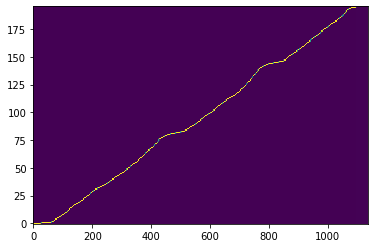

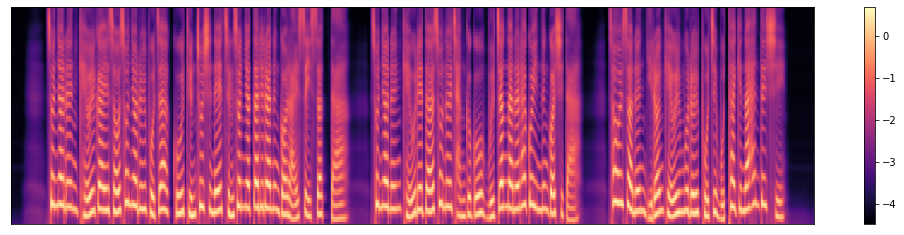

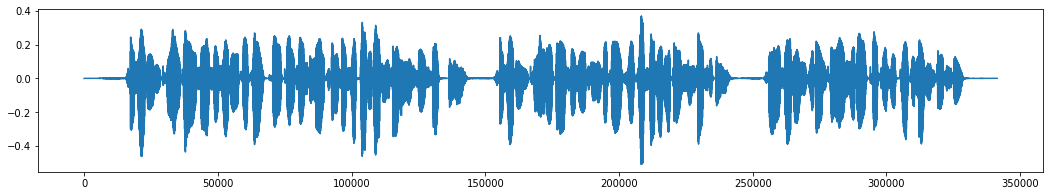

In [49]:
from IPython import display
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import time

with torch.no_grad():
    samples, alignments, _ = model.inference(torch.from_numpy(tokens).cuda().long().unsqueeze(0),
                                 temperature=1.0, clip=1.0, speed=1.0)
    
_s = samples.data.cpu().numpy()
_mels = _s[0]

_alignment = alignments[0].data.cpu().numpy()
plt.imshow(_alignment, aspect='auto', origin='lower', interpolation='none')
plt.show()

plt.figure(figsize=[18, 4])
librosa.display.specshow(_mels)
plt.colorbar()
plt.show()

vocoder.eval()
with torch.no_grad():
    _mel = (_mels.T - mean) / scale
    mel = torch.from_numpy(_mel).cuda()
    wav = vocoder.inference(mel)
    _wav = wav[:, 0].data.cpu().numpy()
    
plt.figure(figsize=[18, 3])
plt.plot(_wav)
plt.show()
    
import IPython.display as ipd
ipd.Audio(_wav, rate=24000)